# Teoría del Error
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Acumulación
En los métodos numéricos y en general en investigación científica es de mucha importancia conocer el efecto acumulado de los errores en la incertidumbre de una función matemática.

## Agenda
1. Propagación
1. Método iterativo
1. Estabilidad
1. Convergencia

In [1]:
# Importando librerias del cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt

# Definicion de nuevas funciones
def _significativas(valor, cifras):
    ''' Reducir un valor a un numero de cifras significativas '''
    posicion_primera_significativa = -int(m.floor(m.log10(abs(valor))))
    digitos = posicion_primera_significativa + cifras - 1
    return round(valor, digitos)

def _normalizar(valor, referencia):
    ''' Aproximar un numero a las cifras significativas de la referencia'''
    posicion_primera_significativa = -int(m.floor(m.log10(abs(referencia))))
    cifra = posicion_primera_significativa + 1
    return _significativas(valor, cifra)

## 1. Propagación
---
En matemáticas la propagación del error es el efecto de variación en la incertidumbre de la variable dependiente dada una incertidumbre en alguna de las variables independientes. A continuación, se define el problema para una función lineal y de n variables independientes.

\begin{align}
y & = f \left( x_1 \pm \Delta x_1, x_2 \pm \Delta x_2, ... , x_n \pm \Delta x_n \right) \\
\Delta y & = \left| \frac{\partial f}{\partial x}\right| \Delta x + \left| \frac{\partial f}{\partial y}\right| \Delta y + ... + \left| \frac{\partial f}{\partial y}\right| \Delta y\\
\end{align}

>**NOTA:** Típicamente estas funciones en investigación científica son complejas y no son lineales; por lo que se requieren técnicas de linealización aproximada, usando para ello instrumentos matemáticos como la expansión de términos en series.

* **Ejemplo:** Modelo de gravitación Básico

\begin{align}
To & = 2 \pi \sqrt{\frac{ L}{ga}} \\
ga(To) & = 4\pi^2 L\frac{1}{T_o^2} \\
ga(To) & = 4\pi^2 L T_o^{-2} \\
\Delta ga & = \left| \frac{\partial ga}{\partial T_o}\right| \Delta T_o \\
\frac{\partial ga}{\partial T_o} & = -2 (4\pi^2 L) T_o^{-3}\\
\end{align}

In [2]:
# Modelo de gravitación Básico
# Medidas directas de longitud y ángulo en el experimento
Longitud = 1; θ = 45; deltaT = 0.30

# Medidas directas del periodo cada 30 segundos
Tr = [2.106, 2.101, 2.098, 2.087, 2.073, 2.070, 2.064, 2.059, 2.057, 2.052]

# Valores reales
Lat = 1.209673                                                      # Latitud de (Pasto - Nariño)
Alt = 2_539                                                         # Altitud de (Pasto - Nariño)
R = 6_371_000                                                       # Radio medio de la tierra
Afc = 1 + 0.0053024 * m.sin(Lat)**2 - 0.0000058 * m.sin(2*Lat)**2   # Aporte de la fuerza centrifuga
Afg = 1 - (2/R)*Alt + (3/R**2)*Alt**2                               # Aporte de la distancia al centro
g = 9.780327 * Afc * Afg

# Péndulo Simple
Ti = np.array(Tr)               # Periodo (Medida directa)
θ_rad = θ * (m.pi/180)          # Conversión del ángulo a radianes (~Medida directa)
To = Ti / (1 + (θ_rad/4)**2)    # Corrección para ángulos grandes (~Medida directa)
K = 4 * Longitud * m.pi**2      # Constante de proporcionalidad (~Medida directa)    

# Medida indirecta o parente de la graveddad
ga = K / To**2

# Valores periodo
μT = sum(To) / len(To)                      # Valor promedio
DT = (sum((μT - To)**2) / len(To))**(1/2)   # Desvicion estandar
ΔT = _significativas(DT, 1)                 # Incertidumbre del periodo (calculada de los datos)
μT_n = _normalizar(μT, ΔT)                  # Valores medios normalizados

# Valores gravedad aparente
μg = sum(ga) / len(ga)                                  # Valor promedio
Dg = (sum((μg - ga)**2) / len(ga))**(1/2)               # Desvicion estandar
dga_dTo = -2 * (4 * Longitud * m.pi**2) * (μT_n)**(-3)  # Derivada
dg = abs(dga_dTo) * ΔT                                  # Calculo de la propagación del Error                               
Δg = _significativas(dg, 1)                             # Incertidumbre de la gravedad aparente
μg_n = _normalizar(μg, Δg)                              # Valores medios normalizados

# Salida estandar
print(f"-----------------------------------------------")
print(f"Valor promedio de T:           {μT:8.4f}")
print(f"Incertidumbre del grupo T:     {DT:8.4f}")
print(f"Valor aparente del grupo:      {μT_n:8.4f} ± {ΔT}")
print(f"-----------------------------------------------")
print(f"Valor promedio de g:           {μg:8.4f}")
print(f"Incertidumbre del grupo g:     {Dg:8.4f}")
print(f"Incertidumbre propagada:       {dg:8.4f}")
print(f"Valor aparente del grupo:      {μg_n:8.4f} ± {Δg}")
print(f"-----------------------------------------------")
print(f"Valor del modelo algebraico:   {g:8.4f}")
print(f"-----------------------------------------------")


-----------------------------------------------
Valor promedio de T:             1.9996
Incertidumbre del grupo T:       0.0181
Valor aparente del grupo:        2.0000 ± 0.02
-----------------------------------------------
Valor promedio de g:             9.8759
Incertidumbre del grupo g:       0.1782
Incertidumbre propagada:         0.1974
Valor aparente del grupo:        9.9000 ± 0.2
-----------------------------------------------
Valor del modelo algebraico:     9.8179
-----------------------------------------------


## 3. Convergencia
---
Es el proceso de operar cifras aproximadas o truncadas

Para tener una idea de por qué importa más la potencia en $\Delta x$ al considerar la convergencia, la siguiente figura muestra cómo las diferentes potencias en la tasa de convergencia pueden afectar la rapidez con la que converge nuestra solución. Tenga en cuenta que aquí estamos dibujando los mismos datos de dos maneras diferentes. Graficar el error como una función de $\Delta x$ es una forma común de mostrar que un método numérico está haciendo lo que esperamos y muestra el comportamiento de convergencia correcto. Dado que los errores pueden reducirse rápidamente, es muy común trazar este tipo de gráficos en una escala log-log para visualizar fácilmente los resultados. Tenga en cuenta que si un método fuera realmente del orden $n$, será una función lineal en el espacio log-log con pendiente $n$.

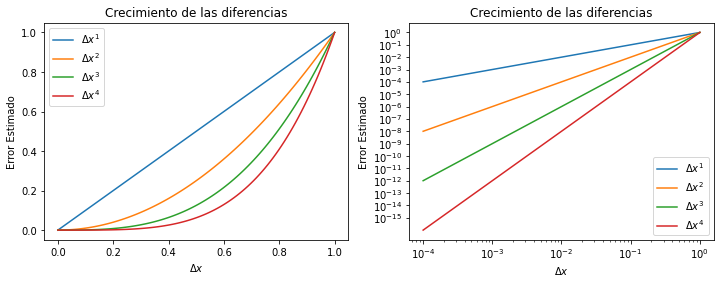

In [3]:
# Vector de variable independiente
dx = np.linspace(1.0, 1e-4, 100)

# Grafica en el plano de el cambio de la varible dependiente con el cambio de la variable independiente
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)

axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

# Vectores de variable dependiente dy = dx^n
for n in range(1, 5): # [1, 2, 3, 4]
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

# Escalando la gráfica
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])

# Textos que aparecen en la gráfica
axes[0].legend(loc=2)
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Crecimiento del Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Error Estimado")
    axes[n].set_title("Crecimiento de las diferencias")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Error Estimado")



## 2. Estabilidad
---
Es el proceso de descartar cifras en la expresión decimal

In [22]:
def _add(self):
    hh = self + "  "
    return hh 

# setattr(str, )

@staticmethod

property()


x="hola"

x._add()





AttributeError: 'str' object has no attribute '_add'

---
## Mas Recursos

- [Propagación de errores](https://en.wikipedia.org/wiki/Rounding) (Wikipedia)
- [Método iterativo](https://es.wikipedia.org/wiki/M%C3%A9todo_iterativo) (Wikipedia)
- [Estabilidad numérica](https://es.wikipedia.org/wiki/Estabilidad_num%C3%A9rica) (Wikipedia)
- [Orden de convergencia](https://es.wikipedia.org/wiki/Orden_de_convergencia) (Wikipedia)
